In [16]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import LeastSquares
import matplotlib.ticker as ticker


data = np.loadtxt("Am241_def_900mm2.txt")
V_bias = data[:,0]
fwhm = data[:,3]
err_fwhm = data[:,4]*15
ch = data[:,1]
err_ch = data[:,2]
fwhm_ch = data[:,5]*10**3
err_fwhm_ch=data[:,6]*10**3*15

err_vbias = []

for i in range(len(V_bias)):
    err_vbias.append(0.5/100*V_bias[i])

print(V_bias)
#print(fwhm[2:6])
#print(sum(fwhm[2:6])/len(fwhm[2:6]))

[10.59 14.69 19.59 23.45 28.03 33.58 38.96 43.38 47.55 52.37 56.82 61.15]


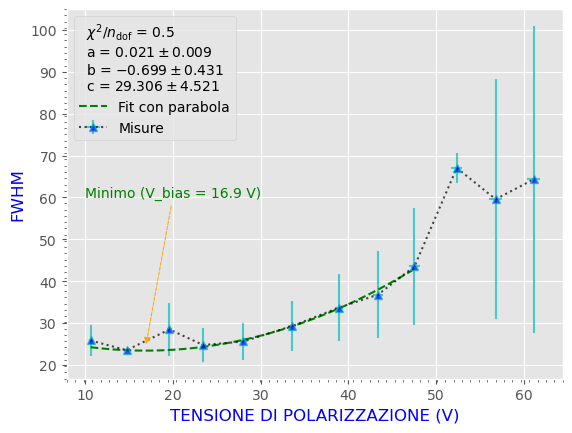

24.306738284915447 8.893163514911386
16.87048377013408 0.11725


In [60]:

fig, ax = plt.subplots()

func1 = lambda x, a, b, c: a*x**2+b*x+c 

least_squares = LeastSquares (V_bias, fwhm, list(map(lambda x: x/2, err_fwhm)), func1)
my_minuit = Minuit (least_squares, a = 0, b = 0, c = 0)
least_squares.mask = (V_bias < 50) & (8 < V_bias)
my_minuit.migrad ()  
my_minuit.hesse ()  

fwhm_best = func1(V_bias[3], my_minuit.values[0], my_minuit.values[1], my_minuit.values[2])
V_best = -my_minuit.values[1]/2/my_minuit.values[0]
err_V_best = err_vbias[3]
err_fwhm_best = np.sqrt((err_V_best*(2*V_best*my_minuit.values[0]+my_minuit.values[1])**2+(my_minuit.errors[0]*V_best**2)**2+(my_minuit.errors[1]*V_best)**2+(my_minuit.errors[2])**2))

x = np.linspace(V_bias[0], V_bias[8], 100)

plt.errorbar(V_bias, fwhm, xerr= list(map(lambda x: x*2.5, err_vbias)), yerr= err_fwhm, linestyle=":", marker="^", color="k", mec="c", mfc="b", ecolor="c", label="Misure", alpha=.7)
plt.plot(x, func1(x, my_minuit.values[0], my_minuit.values[1], my_minuit.values[2]), linestyle="--", color="g", label="Fit con parabola")
plt.grid("on")
plt.xlabel("TENSIONE DI POLARIZZAZIONE (V)", color="b")
plt.ylabel("FWHM", color="b")

plt.style.use("ggplot")

ax.annotate(f'Minimo (V_bias = {round(V_best,1)} V)', xy=(V_best, fwhm_best),
             xycoords='data',
             xytext=(10, 60),
             textcoords='data',
             arrowprops=dict(arrowstyle= '-|>',
                             color='orange',
                             lw=.7,
                             ls='--'),
            color="g"
           )

#plt.xlim(10, 80)
# For the x-axis
ax.xaxis.set_minor_locator(ticker.LinearLocator(60))
#ax.xaxis.set_major_locator(ticker.LinearLocator(8))
# For the y-axis
ax.yaxis.set_minor_locator(ticker.LinearLocator(60))
#ax.yaxis.set_major_locator(ticker.LinearLocator(8))

fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {my_minuit.fmin.reduced_chi2:.1f}",
]
for p, v, e in zip(my_minuit.parameters, my_minuit.values, my_minuit.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")

plt.legend(title="\n".join(fit_info), frameon=True, loc="upper left")

plt.show()

print(fwhm_best, err_fwhm_best)
print(V_best, err_V_best)


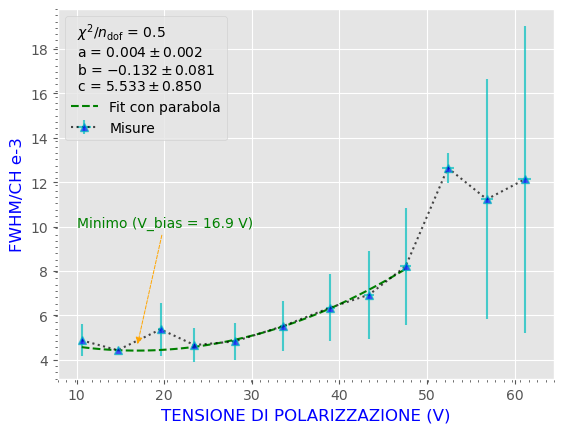

4.586251233722475 1.6736692237803377
16.887303418798748 0.11725


In [80]:
fig, ax = plt.subplots()

func1 = lambda x, a, b, c: a*x**2+b*x+c 

least_squares2 = LeastSquares (V_bias, fwhm_ch, list(map(lambda x: x/2, err_fwhm_ch)), func1)
my_minuit2 = Minuit (least_squares2, a = 0, b = 0, c = 0)
least_squares2.mask = (V_bias < 50) & (8 < V_bias)
my_minuit2.migrad ()  
my_minuit2.hesse ()  

fwhm_best2 = func1(V_bias[3], my_minuit2.values[0], my_minuit2.values[1], my_minuit2.values[2])
V_best2 = -my_minuit2.values[1]/2/my_minuit2.values[0]
err_V_best2 = err_vbias[3]
err_fwhm_best2 = np.sqrt((err_V_best2*(2*V_best*my_minuit2.values[0]+my_minuit2.values[1])**2+(my_minuit2.errors[0]*V_best2**2)**2+(my_minuit2.errors[1]*V_best2)**2+(my_minuit2.errors[2])**2))

x2 = np.linspace(V_bias[0], V_bias[8], 100)


plt.errorbar(V_bias, fwhm_ch, xerr= list(map(lambda x: x*2.5, err_vbias)), yerr= list(map(lambda x: x, err_fwhm_ch)), linestyle=":", marker="^", label="Misure", color="k", mec="c", mfc="b", ecolor="c", alpha=.7)
plt.plot(x2, func1(x2, my_minuit2.values[0], my_minuit2.values[1], my_minuit2.values[2]), linestyle="--", color="g", label="Fit con parabola")

plt.grid("on")
plt.xlabel("TENSIONE DI POLARIZZAZIONE (V)", color="b")
plt.ylabel("FWHM/CH e-3", color="b")

plt.style.use("ggplot")

#plt.xlim(10, 80)
#plt.ylim(round(ch[0], 1), round(ch[-1],1))
# For the x-axis
ax.xaxis.set_minor_locator(ticker.LinearLocator(60))
#ax.xaxis.set_major_locator(ticker.LinearLocator(8))
# For the y-axis
ax.yaxis.set_minor_locator(ticker.LinearLocator(60))
#ax.yaxis.set_major_locator(ticker.LinearLocator(8))

ax.annotate(f'Minimo (V_bias = {round(V_best2,1)} V)', xy=(V_best2, fwhm_best2),
             xycoords='data',
             xytext=(10, 10),
             textcoords='data',
             arrowprops=dict(arrowstyle= '-|>',
                             color='orange',
                             lw=.7,
                             ls='--'),
            color="g"
           )

fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {my_minuit2.fmin.reduced_chi2:.1f}",
]
for p, v, e in zip(my_minuit2.parameters, my_minuit2.values, my_minuit2.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")

plt.legend(title="\n".join(fit_info), frameon=True, loc="upper left")

plt.show()

print(fwhm_best2, err_fwhm_best2)
print(V_best2, err_V_best2)


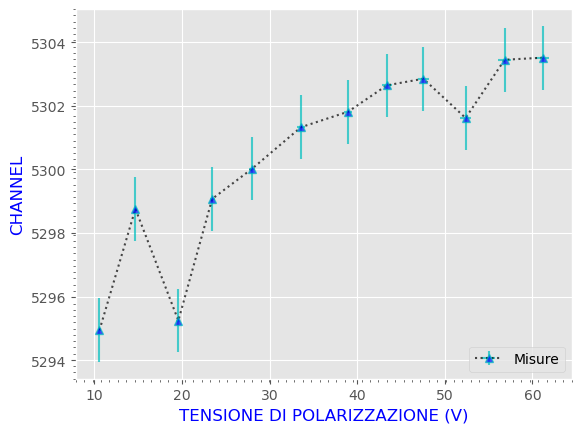

In [22]:
#Vbias vs channel
fig, ax = plt.subplots()

plt.errorbar(V_bias, ch, xerr=list(map(lambda x: x*2.5, err_vbias)), yerr=list(map(lambda x: x, err_ch)), linestyle=":", marker = "^", color="k", mec="c", mfc="b", ecolor="c", label="Misure", alpha=.7)
plt.grid("on")
plt.style.use("ggplot")
plt.xlabel("TENSIONE DI POLARIZZAZIONE (V)", color="b")
plt.ylabel("CHANNEL", color="b")


pesi = list(map(lambda x: 1/x**2, err_ch))
plateau = 0
for i in range(len(ch[10:])):
    plateau = plateau + ch[i+10]*pesi[i+10]

plateau = plateau/sum(pesi[10:])
err_plateau = 1/np.sqrt(sum(pesi[10:]))

#plt.hlines(plateau, V_bias[0], V_bias[-1], linestyle="--", color="g", label=f"Plateau = {round(plateau,2)} +/- {round(err_plateau,2)}")

#plt.xlim(10, 80)
#plt.ylim(round(ch[0], 1), round(ch[-1],1))
# For the x-axis
ax.xaxis.set_minor_locator(ticker.LinearLocator(60))
# For the y-axis
ax.yaxis.set_minor_locator(ticker.LinearLocator(60))

plt.legend(loc = "lower right")
plt.show()